# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Цель исследования:
- узнать какие факторы влияют на стоимость жилья

Ход исследования:
- обзор данных
- предобработка данных
- оценить влияние характеристик продаваемых квартир на их стоимость
- оценить влияние расположения продаваемых квартир на стоимость

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv') #глобальную ссылку подсмотрел с предыдущего проекта
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

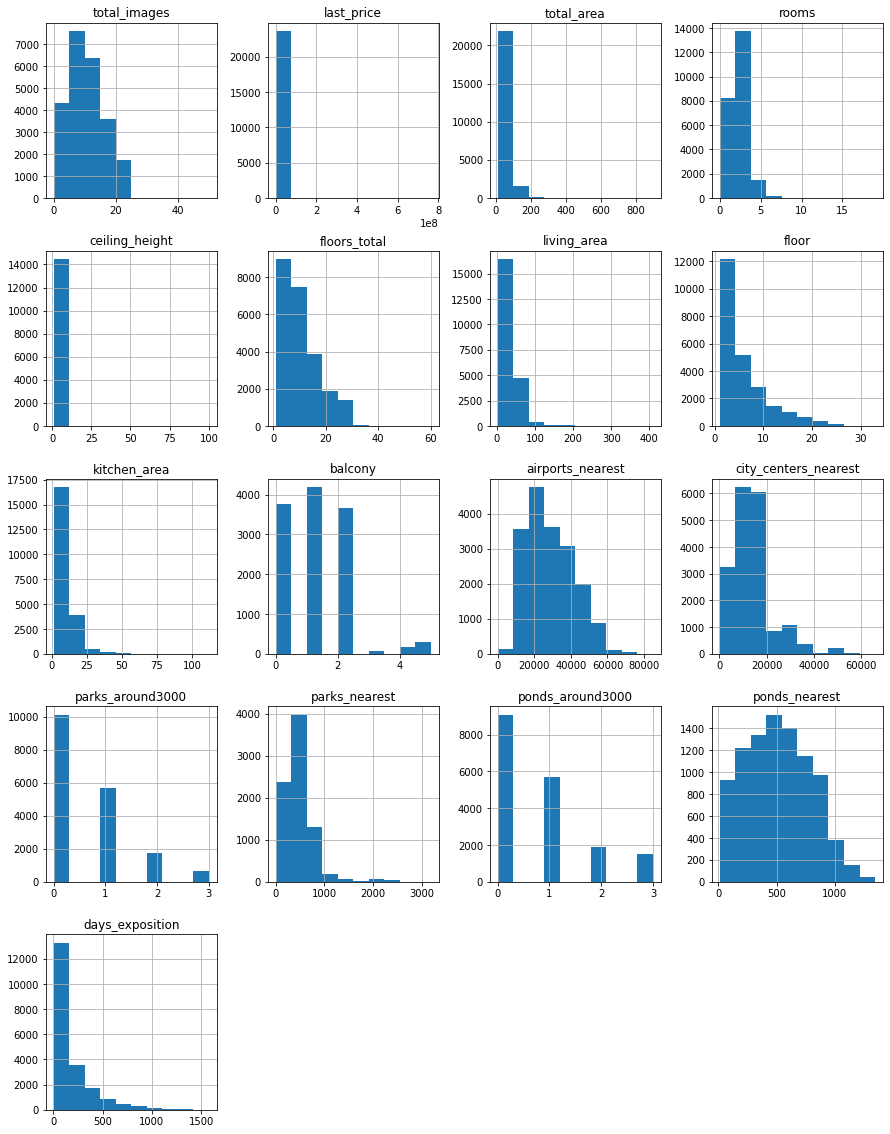

In [4]:
df.hist(figsize=(15, 20));

По полученной инфармации о датафрейме минивыводы: 

    - last_price тип float64 (удобнее будет проводить расчеты с целыми)
    - first_day_exposition тип object 
    - ceiling_height много пропусков (больше 5%)
    - floors_total тип float64, есть пропуски (меньше 5%)
    - living_area пропуски (~8%)
    - is_apartment пропуски, тип object (подойдет bool)
    - kitchen_area пропуски (~9%)
    - balcony пропуски (скорее всего заполнять на нулевые значения), тип данных float64 (подойдет int64)
    - locality_name пропуски (меньше 5%)
    - days_exposition тип float64 (подойдет int64), есть пропуски  
    
Столбцы airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest большое количество пропусков, скорее всего связанных не с человеческим фактором, скорее всего ошибка в системе, следует дать подсказку разработчикам.

### Предобработка данных

In [5]:
#print(df['rooms'].value_counts())
#print(df['floors_total'].value_counts())
#print(df['floor'].value_counts())
#print(df['is_apartment'].value_counts())
#print(df['balcony'].value_counts())  
#print(df['days_exposition'].value_counts())

In [6]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d') 
#без времени, оно везде нулевое, да и роли не играет

In [7]:
df['balcony'] = df['balcony'].fillna(value=0).astype('int64') 

0.0015190514367694839


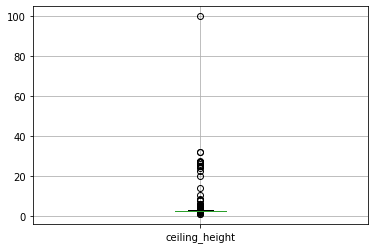

In [8]:
ceiling_height_median = df['ceiling_height'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(ceiling_height_median) #заполним медианным значением высоту потолков
df.boxplot(column='ceiling_height')
print(len(df[df['ceiling_height'] > 5]) / len(df)) #доля квартир, высота потолков которых > 5м, очень мала, можно обрезать

(2.0, 3.0)

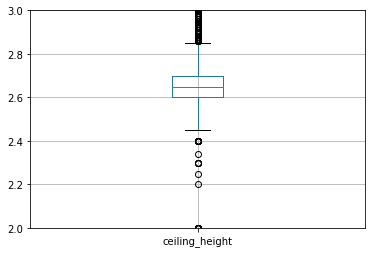

In [9]:
import matplotlib.pyplot as plt
df.boxplot(column='ceiling_height')
plt.ylim(2,3)

In [10]:
df = df[df['ceiling_height'] <= 5]

In [11]:
df['last_price'] = df['last_price'].astype('int64')

In [12]:
df['locality_name'] = df['locality_name'].str.lower()
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'] = df['locality_name'].str.replace('городского типа ', '')
#df['locality_name'].nunique()

In [13]:
df.duplicated().sum()

0

Явные дубликаты в датафрейме отсутствуют.

Вывод:

После предобработки с данными возможно будет решить поставленную задачу.

### Посчитайте и добавьте в таблицу новые столбцы

In [14]:
#Цена 1кв.м:
df['price_per_sqr_meter'] = df['last_price'] / df['total_area']
df['price_per_sqr_meter'] = df['price_per_sqr_meter'].astype('int64') #целых чисел будет достаточно для дальнейшего анализа

In [15]:
#столбцы с днями недели, месяцами и годами публикации объявления 
df['weekday_exp'] = df['first_day_exposition'].dt.weekday
df['month_exp'] = df['first_day_exposition'].dt.month
df['year_exp'] = df['first_day_exposition'].dt.year

In [16]:
#функция определения квартиры по типу первый-другой-последний:
def floor_categorize(row):    
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floors_total'] == row['floor']:
            return 'последний'
        else:
            return 'другой'
    except:
        pass
df['category_by_floor'] = df.apply(floor_categorize, axis=1)

In [17]:
df['center_distance_km'] = df['city_centers_nearest'] / 1000
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23663 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23663 non-null  int64         
 1   last_price            23663 non-null  int64         
 2   total_area            23663 non-null  float64       
 3   first_day_exposition  23663 non-null  datetime64[ns]
 4   rooms                 23663 non-null  int64         
 5   ceiling_height        23663 non-null  float64       
 6   floors_total          23577 non-null  float64       
 7   living_area           21762 non-null  float64       
 8   floor                 23663 non-null  int64         
 9   is_apartment          2762 non-null   object        
 10  studio                23663 non-null  bool          
 11  open_plan             23663 non-null  bool          
 12  kitchen_area          21394 non-null  float64       
 13  balcony         

### Проведите исследовательский анализ данных

count    23663.000000
mean        60.315048
std         35.526290
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

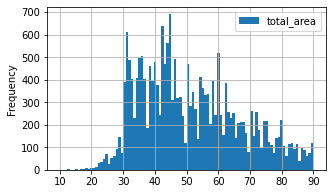

In [18]:
#общая площадь:
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (10,90));
df['total_area'].describe()

    - средняя площадь = 60,31 м2
    - медиана площади = 52 м2
    - общая площадь находится в значениях от 12 до 900 м2

count    21762.000000
mean        34.439884
std         21.983337
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

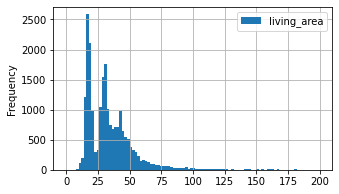

In [19]:
#жилая площадь
df.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,200));
df['living_area'].describe()

    - средняя жилой площади = 34.45 м2
    - медиана жилой площади = 30 м2
    - жилая площадь находится в значениях от 2 до 409.7 м2

count    21394.000000
mean        10.567395
std          5.895583
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

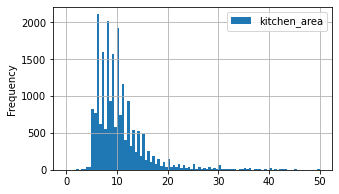

In [20]:
#кухня
df.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,50));
df['kitchen_area'].describe()

    - средняя площадь кухонь = 10.6 м2
    - медиана площади кухонь = 9.1 м2
    - площадь кухонь находится в значениях от 1.3 до 112 м2

count    23663.000000
mean         6.038034
std         10.839829
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max        763.000000
Name: last_price_mln, dtype: float64

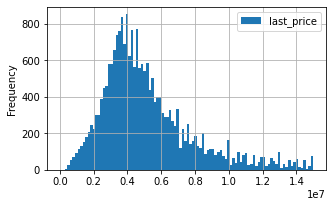

In [21]:
#цена:
df.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,15000000));
df['last_price_mln'] = df['last_price'] // 1000000 #для удобства просмотра в млн.руб
df['last_price_mln'].describe()

    - средняя цена = 6.05 млн.руб.
    - медиана цен = 4 млн. руб.
    - цены находятся в значениях от 0 до 763 млн.руб

count    23663.000000
mean         2.070490
std          1.077945
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

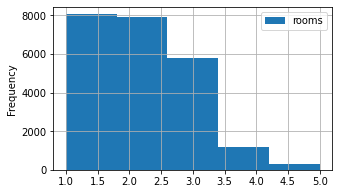

In [22]:
#комнат в доме
df.plot(y = 'rooms', kind = 'hist', bins = 5, grid=True, figsize = (5,3), range = (1,5));
df['rooms'].describe()

    - среднее количество комнат = 2
    - медианное значение количества комнат = 2
    - количество комнат находится в значениях от 0 до 19 

count    23663.000000
mean         2.695946
std          0.216254
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

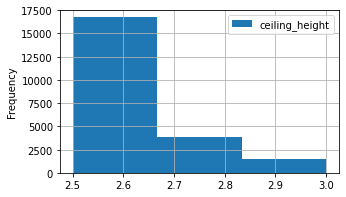

In [23]:
#высота потолков
df.plot(y = 'ceiling_height', kind = 'hist', bins = 3, grid=True, figsize = (5,3), range = (2.5, 3));
df['ceiling_height'].describe()

    - средняя высота потолков = 2.69 м 
    - медианное значение высот потолков = 2.65 м
    - высота потолков находится в значениях от 1 м до 5 м

count    23663.000000
mean         5.892744
std          4.885321
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

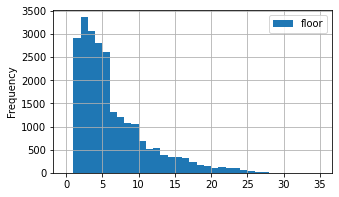

In [24]:
#этаж
df.plot(y = 'floor', kind = 'hist', bins = 35, grid=True, figsize = (5,3), range = (0,35));
df['floor'].describe()

    - среднее значение = 5.89 
    - медианное значение = 4 
    - разброс значениий от 1 до 33

count    23577.000000
mean        10.676464
std          6.595659
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

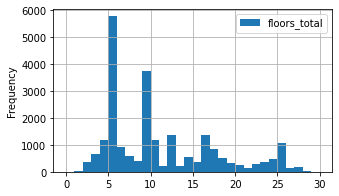

In [25]:
#количество этажей в доме
df.plot(y = 'floors_total', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range = (0,30));
df['floors_total'].describe()

    - среднее значение = 10.67 
    - медианное значение = 9 
    - разброс значениий от 1 до 60

count    18154.000000
mean     14194.841633
std       8606.328441
min        181.000000
25%       9238.000000
50%      13104.500000
75%      16293.750000
max      65968.000000
Name: city_centers_nearest, dtype: float64

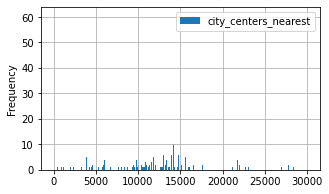

In [26]:
#удаленность от центра
df.plot(y = 'city_centers_nearest', kind = 'hist', bins = 30000, grid=True, figsize = (5,3), range = (0,30000));
df['city_centers_nearest'].describe()

    - среднее значение = 14194.84 м 
    - медианное значение = 13104.5 м 
    - разброс значениий от 181 м до 65968 м 

count    18131.000000
mean     28796.964481
std      12631.735698
min          0.000000
25%      18582.000000
50%      26729.000000
75%      37284.000000
max      84869.000000
Name: airports_nearest, dtype: float64

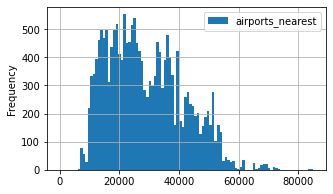

In [27]:
#удаленность от аэропорта
df.plot(y = 'airports_nearest', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,85000));
df['airports_nearest'].describe()

    - среднее значение = 28796.96 м 
    - медианное значение = 26729 м 
    - разброс значениий от 0 м до 84869 м

count    8064.000000
mean      490.878100
std       342.512806
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

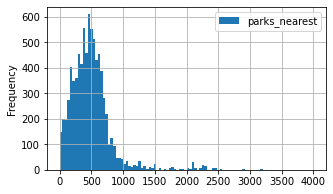

In [28]:
#удаленномть от парка
df.plot(y = 'parks_nearest', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,4000));
df['parks_nearest'].describe()

    - среднее значение = 490.87 м
    - медианное значение = 455 м
    - разброс значениий от 1 м до 3190 м

count    23663.000000
mean         2.569454
std          1.789388
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_exp, dtype: float64

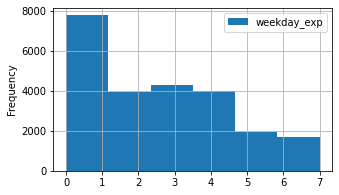

In [29]:
#день недели публикации
df.plot(y = 'weekday_exp', kind = 'hist', bins = 6, grid=True, figsize = (5,3), range = (0,7));
df['weekday_exp'].describe()

В будние дни выкладывается гораздо больше объявлений чем в выходные.
- Медиана = 3 (четверг)
- Среднее значение = 2.57

count    23663.000000
mean         6.400456
std          3.491621
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exp, dtype: float64

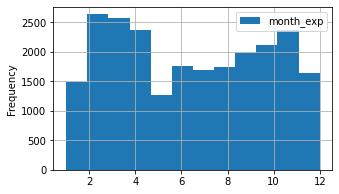

In [30]:
#месяц публикации
df.plot(y = 'month_exp', kind = 'hist', bins = 12, grid=True, figsize = (5,3), range = (1,12));
df['month_exp'].describe()

count    23663.000000
mean         6.400456
std          3.491621
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exp, dtype: float64

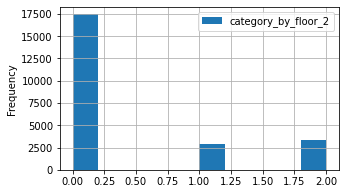

In [31]:
#функция определения квартиры по типу первый-другой-последний:
def floor_categorize_x(row):    
    try:
        if row['category_by_floor'] == 'первый':
            return 1
        elif row['category_by_floor'] == 'последний':
            return 2
        else:
            return 0
    except:
        pass
    
df['category_by_floor_2'] = df.apply(floor_categorize_x, axis=1)
df.plot(y = 'category_by_floor_2', kind = 'hist', bins = 10, grid=True, figsize = (5,3), range = (0, 2));
df['month_exp'].describe()

Доля предлагаемых квартир на первом и последнем этаже значительно меньше чем на остальных этажах.

count    20490.000000
mean       180.872133
std        219.748461
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

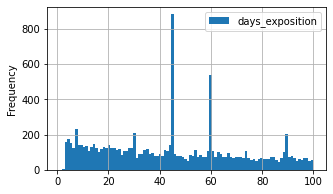

In [32]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (1,100));
df['days_exposition'].describe()

Встречаются аномалии на значениях 45, 60, 90 дней, связано это с тем, срок размещения объявлений для квартир стоимостью до 4,5 млн — 45 дней, от 4,5 до 10 млн — 60 дней, от 10 млн — 90 дней, эта информация указана в Яндекс.Справка, в графе "как разместить объявление" (https://yandex.ru/support/realty/owner/home/add-ads-housing.html), данная информация не относится к городу "Санкт-Петербург"

75% продаж квартир укладывается в 232 дня ( примерно 8 месяцев), такие продажи можно считать приемлемыми по срокам. Свыше года - уже большой срок для продажи квартиры.

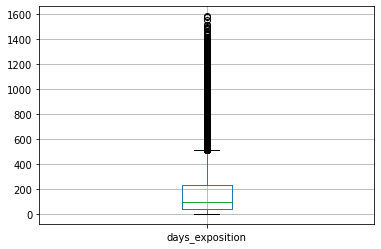

In [33]:
df.boxplot(column='days_exposition');

0.30025500637894953

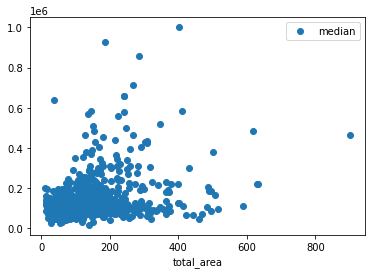

In [34]:
#зависимость цены от общей площади
price_total_area = df.pivot_table(index='total_area', values='price_per_sqr_meter', aggfunc=['mean', 'count', 'median'])
price_total_area.columns = ['mean', 'count', 'median']
price_total_area.plot(y='median', style='o');
df['total_area'].corr(df['price_per_sqr_meter'])

Слабая, положительная корреляция - 0.3

0.22292953367810395

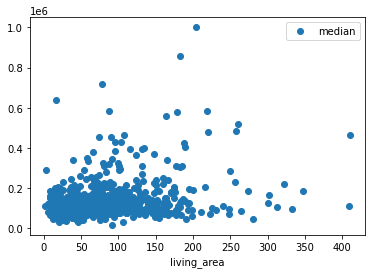

In [35]:
#зависимость цены от жилой площади
price_living_area = df.pivot_table(index='living_area', values='price_per_sqr_meter', aggfunc=['mean', 'count', 'median'])
price_living_area.columns = ['mean', 'count', 'median']
price_living_area.plot(y='median', style='o');
df['living_area'].corr(df['price_per_sqr_meter'])

Очень слабая, положительная корреляция - 0.22

0.3966827268492754

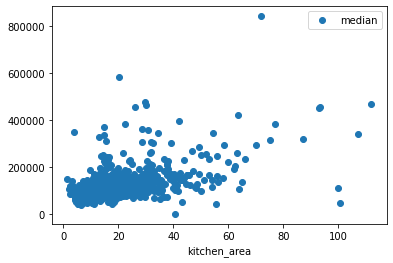

In [36]:
#зависимость цены от площади кухни
price_kitchen_area = df.pivot_table(index='kitchen_area', values='price_per_sqr_meter', aggfunc=['mean', 'count', 'median'])
price_kitchen_area.columns = ['mean', 'count', 'median']
price_kitchen_area.plot(y='median', style='o')
df['kitchen_area'].corr(df['price_per_sqr_meter'])

Зависимость площади кухни от цены за квадратный метр наблюдается выше чем от общей и жилой площади: 

слабая, положительная корреляция - 0.39

0.05411263983544008

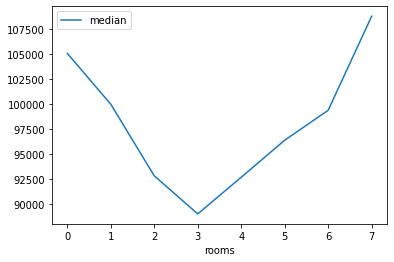

In [37]:
#зависимость цены от количества комнат
price_total_rooms = df.pivot_table(index='rooms', values='price_per_sqr_meter', aggfunc=['mean', 'count', 'median'])
price_total_rooms.columns = ['mean', 'count', 'median']
price_total_rooms.query('count > 50').plot(y='median')
df['rooms'].corr(df['price_per_sqr_meter'])

Чем ближе квартира по характеристике "количество комнат" к значению - 3, тем ниже стоимость одного квадратного метра!

-0.00680636135942301

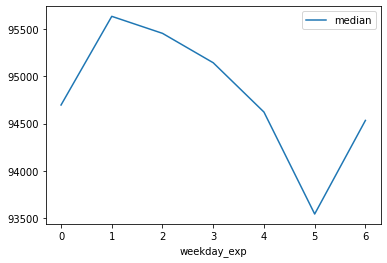

In [38]:
#зависимость цены от типа этажа
price_weekday_exp = df.pivot_table(index='weekday_exp', values='price_per_sqr_meter', aggfunc=['mean', 'count', 'median'])
price_weekday_exp.columns = ['mean', 'count', 'median']
price_weekday_exp.plot(y='median')
df['weekday_exp'].corr(df['price_per_sqr_meter'])

В субботу во всех выкладываемых объявлениях стоимость одного квадратного метра наименьшая, но очень незначительная.

<AxesSubplot:xlabel='category_by_floor'>

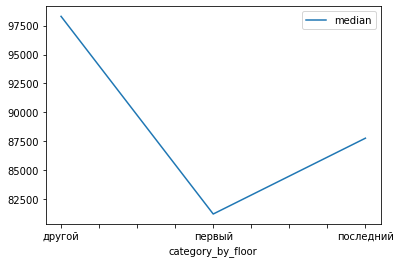

In [39]:
#зависимость цены от дня недели размещения объявления
price_category_by_floor = df.pivot_table(index='category_by_floor', values='price_per_sqr_meter', aggfunc=['mean', 'count', 'median'])
price_category_by_floor.columns = ['mean', 'count', 'median']
price_category_by_floor.plot(y='median')

По данному графику можно явно выделить следующее:
- на первом этаже медианная стоимость за квадратный метр самая низкая
- на последнем этаже - ниже чем на других, но выше чем на первом

-0.00265163452305725

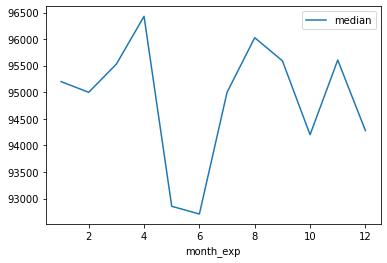

In [40]:
#зависимость цены от месяца размещения объявления
price_month_exp = df.pivot_table(index='month_exp', values='price_per_sqr_meter', aggfunc=['mean', 'count', 'median'])
price_month_exp.columns = ['mean', 'count', 'median']
price_month_exp.plot(y='median')
df['month_exp'].corr(df['price_per_sqr_meter'])

В середине года стоимость одного квадратного метра в публикуемых объявлениях незначительно ниже.

0.00886048904868649

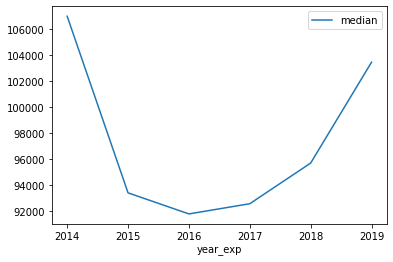

In [41]:
#зависимость цены от года размещения объявления
price_year_exp = df.pivot_table(index='year_exp', values='price_per_sqr_meter', aggfunc=['mean', 'count', 'median'])
price_year_exp.columns = ['mean', 'count', 'median']
price_year_exp.plot(y='median')
df['year_exp'].corr(df['price_per_sqr_meter'])

Коэффициент корреляции очень близок к нулю, но тенденцию роста цены за квадратный метр на протяжении с 2014 по 2019 год хорошо видно на графике.

Самая низкая цена за квадратный метр в публикуемых объявлениях была с 2015 по первую половину 2017 года.

0.6522654172002423

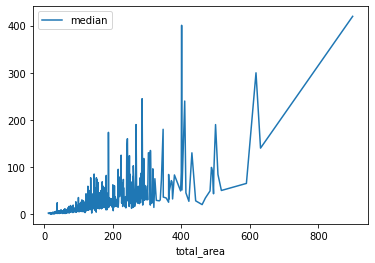

In [42]:
price_area = df.pivot_table(index='total_area', values='last_price_mln', aggfunc=['mean', 'count', 'median'])
price_area.columns = ['mean', 'count', 'median']
price_area.plot(y='median')
df['total_area'].corr(df['last_price_mln'])

Коэффициент корреляции = 0.65, зависимость стоимости продаваемой квартиры от ее полной площади средняя.

-0.07899448537959498

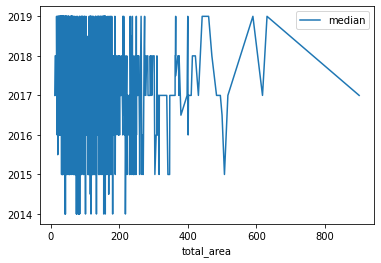

In [43]:
year_area = df.pivot_table(index='total_area', values='year_exp', aggfunc=['mean', 'count', 'median'])
year_area.columns = ['mean', 'count', 'median']
year_area.plot(y='median')
df['total_area'].corr(df['year_exp'])

Коэффициент корреляции = - 0.07, зависимость площади продаваемой квартиры от года продажи отсутствует.

In [44]:
#выборка из 10 населенных пунктов с наибольшим количеством объявлений
df['id'] = 1
top_names = df.groupby(
    'locality_name')['id'].sum().reset_index().sort_values(
    by='id', ascending=False).head(10)['locality_name']

In [45]:
top_names

309      санкт-петербург
218       поселок мурино
299       поселок шушары
3             всеволожск
303               пушкин
131              колпино
228    поселок парголово
6                гатчина
56       деревня кудрово
4                 выборг
Name: locality_name, dtype: object

In [46]:
df.query(
    'locality_name in @top_names').groupby(
    'locality_name', dropna=True).agg({
    'price_per_sqr_meter': 'median'}).reset_index().sort_values(
    by='price_per_sqr_meter', ascending=False)

,locality_name,price_per_sqr_meter
9,санкт-петербург,104761.0
8,пушкин,100000.0
3,деревня кудрово,91860.0
6,поселок парголово,91642.0
5,поселок мурино,85878.0
7,поселок шушары,76876.0
4,колпино,74723.5
2,гатчина,67860.0
0,всеволожск,65789.0
1,выборг,58158.0


Самое дорогой квадратный метр жилья находится в Санкт-Петербурге, а в Выборге этот показатель почти в два раза меньше.

In [47]:
df1 = df[~df['center_distance_km'].isna()]
df1['center_distance_km'] = df1['center_distance_km'].astype('int64') #округление расстояния до центра в километрах

/tmp/ipykernel_575/1466610242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['center_distance_km'] = df1['center_distance_km'].astype('int64') #округление расстояния до центра в километрах


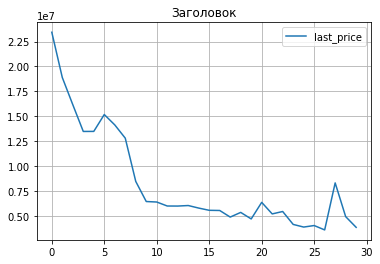

In [48]:
df1.query(
    'locality_name == "санкт-петербург"').groupby(
    'center_distance_km').agg({
    'last_price': 'mean'}).reset_index().sort_values(
    by='center_distance_km', ascending=True).plot(
    y='last_price', 
    grid = True,
    title = 'Заголовок');

На расстоянии 3км от центра Санкт-Петербурга, стоимость жилья дешевле чем на удалении в 5км.

### Общий вывод

Во время выполнения задания была проделана следующая работа: 
- обработаны пропущенные значения
- удалены неявные дубликаты
- заменен тип данных где это было необходимо для дальнейшего анализа
- посчитана и добавлена стоимость жилья за квадратный метр
- добавлен тип этажа (первый, последний, другой)

Изучены следующие параметры:
- выбивающиеся значения
- аномалии


Выявили что встречаются аномалии на значениях 45, 60, 90 дней, связано это с тем, срок размещения объявлений для квартир стоимостью до 4,5 млн — 45 дней, от 4,5 до 10 млн — 60 дней, от 10 млн — 90 дней, эта информация указана в Яндекс.Справка, в графе "как разместить объявление" (https://yandex.ru/support/realty/owner/home/add-ads-housing.html), данная информация не относится к городу "Санкт-Петербург".

Стоимость жилья зависит от:
- количества комнат
- типа этажа (первый, последний, другой)
- населенный пункт, в котором находится квартира
- удаленность от центра города
- площади 

Стоимость жилья не зависит, или слабо зависит от:
- жилой площади
- общей площади
- площади кухни
- дня недели
- месяца публикации 

С начала 2015 года по середину 2017, стоимость жилья была значительно ниже остальных периодов.
Самое дорогое жилье находится в Санкт-Петербурге, чем ближе к центру - тем дороже. На удалении 3 км от центра стоимость квадратного метра ниже чем на удалении в 5 км.
75% опубликованных квартир продается за 232 дня.